# CLASSIFICAÇÃO

In [1]:
import torch
from torch import nn


if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [2]:
from sklearn import datasets

wine = datasets.load_wine()
data = wine.data
target = wine.target

print(data.shape, target.shape)
print(wine.feature_names, wine.target_names)

(178, 13) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] ['class_0' 'class_1' 'class_2']


In [3]:
class WineClassifier(nn.Module):

    def __init__(self, input_size, hidden_size, out_size):
      super(WineClassifier, self).__init__()
      self.hidden = nn.Linear(input_size, hidden_size)
      self.relu = nn.ReLU()
      self.out = nn.Linear(hidden_size, out_size)
      self.softmax = nn.Softmax()

    def forward(self, X):
      feature = self.relu(self.hidden(X))
      output = self.softmax(self.out(feature))
      return output

input_size = data.shape[1] # tamanho do dado
hidden_size = 32  # numero de neuronios
out_size = len(wine.target_names) # numero de classes que eu quero classificar

# criar rede neural
net = WineClassifier(input_size, hidden_size, out_size).to(device)
print(net)




WineClassifier(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)


Instanciar a função de perda de sua escolha. Cross Entropy é a função recomendada. 

In [4]:
criterion = nn.CrossEntropyLoss().to(device)
print(criterion)

# OUTROS EXEMPLOS
# criterion = nn.L1Loss().to(device)
# criterion = nn.MSELoss().to(device)
# criterion = nn.CTCLoss().to(device)
# criterion = nn.NLLLoss().to(device)
# criterion = nn.PoissonNLLLoss().to(device)


CrossEntropyLoss()


Transformar os dados em tensores

In [5]:
x_tensor = torch.from_numpy(data).float()
y_tensor = torch.from_numpy(target)

x_tensor = x_tensor.to(device)
y_tensor = y_tensor.to(device)

print(x_tensor.dtype, y_tensor.dtype)

torch.float32 torch.int64


In [6]:
pred = net(x_tensor)

print(pred.shape, y_tensor.shape)

print(pred[0].data, y_tensor[0].data)

torch.Size([178, 3]) torch.Size([178])
tensor([8.3957e-27, 1.0000e+00, 3.2365e-37], device='cuda:0') tensor(0, device='cuda:0')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


# REGRESSÃO

In [7]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

print(data.shape, target.shape)

print(data[14])
# Os targets agora são valores continuos
print(target[14])

(442, 10) (442,)
[ 4.53409833e-02 -4.46416365e-02 -2.56065715e-02 -1.25563519e-02
  1.76943802e-02 -6.12835791e-05  8.17748397e-02 -3.94933829e-02
 -3.19914449e-02 -7.56356220e-02]
118.0


In [8]:
class DiaClassifier(nn.Module):

  def __init__(self, input_size: int, hidden_size: int, out_size: int):
    # inicialização obrigatoria da classe base
    super(DiaClassifier, self).__init__()
    # definição da arquitetura dessa modelagem
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.out = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax(dim=-1)

  def forward(self, X):
    feature = self.relu(self.hidden(X))
    output = self.softmax(self.out(feature))
    return output

# segunda dimensão do shape é a quantidade de caracteristicas
input_size  = data.shape[1]
hidden_size = 32
output_size = 1 # progressão da diabetes, 1 neuronio de saida apenas

netDiabetes = DiaClassifier(input_size, hidden_size, output_size).to(device) #cast na GPU 

Em problemas de regressão o rotulo e a predição devem ter a mesma dimensionalidade.

In [9]:


# Cast na GPU dos dados
Xtns = torch.from_numpy(data).float().to(device)
Ytns = torch.from_numpy(target).float().to(device)

print(Xtns.shape, Ytns.shape)

torch.Size([442, 10]) torch.Size([442])


In [10]:
# Realziar o forward na rede
criterionRegression = nn.MSELoss().to(device)

pred = netDiabetes(Xtns)
print("pred.Shape():" + str(pred.shape))
print("pred.Shape().squeeze():" + str(pred.squeeze().shape))
print("Ytns.size:" + str(Ytns.shape))
loss = criterionRegression(pred.squeeze(), Ytns)

print(loss.data)

pred.Shape():torch.Size([442, 1])
pred.Shape().squeeze():torch.Size([442])
Ytns.size:torch.Size([442])
tensor(28771.2168, device='cuda:0')


# OTIMIZAÇÃO

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Text(0, 0.5, 'color_intensity')

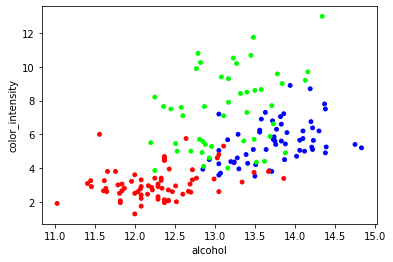

In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt

features = [0, 9]

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

# CARREGAR SOMENTE TEOR ALCOLICO E INTENSIDADE DA COR
print(wine.feature_names)

plt.scatter(data[:, 0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

# NORMALIZAÇÃO

Text(0, 0.5, 'color_intensity')

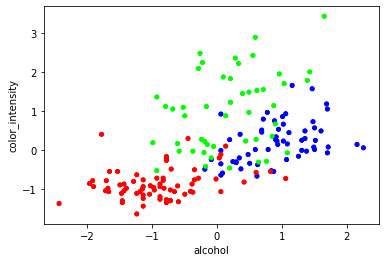

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.scatter(data[:, 0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

plt.scatter(data[:, 0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

In [13]:
import torch
from torch import nn

torch.manual_seed(42)

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(wine.target_names) # numero de classes 

net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, out_size),
    nn.Softmax()
)

net = net.to(device)

cuda


In [14]:
import numpy as np 

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
  spacing = min(x_max - x_min, y_max - y_min) / 100
  
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
  data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)
  
  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
  Z = clf.reshape(XX.shape)
  
  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


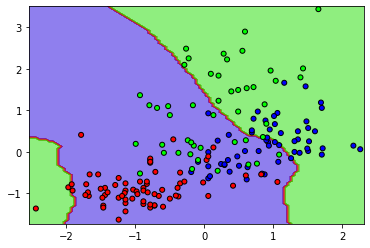

In [15]:
plot_boundary(data, targets, net)

* Gradiente descendente



In [19]:
from torch import optim

# FUNÇÃO DE PERDA
criterion = nn.CrossEntropyLoss().to(device)


# otimizador: Gradient Descendt
# lr taxa de aprendizado, não pode ser muito alto e baixo.
learning_rate = 1e-4
weight_decay = 1e-4

opt = "ADAM"
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

if opt == "SGD":
  # Gradiente descendente
  optimizer = optim.SGD(net.parameters(), lr=learning_rate)
elif opt == "SGD_M":
  # gradiente descendente + momenntum
  optimizer = optim.SGD(net.parameters(), 
                        lr=learning_rate, 
                        momentum=0.9)
elif opt == "SGD_MN":
  # gradiente descendente + momenntum + nesterov
  optimizer = optim.SGD(net.parameters(), 
                        lr=learning_rate, 
                        momentum=0.9,
                        nesterov=True)
elif opt == "SGD_MW":
  # decaimento de pesos
  optimizer = optim.SGD(net.parameters(), 
                        lr=learning_rate, 
                        momentum=0.9,
                        weight_decay=weight_decay)
elif opt == "ADAG":
  # Adagrad
  optimizer = optim.Adagrad(net.parameters(), 
                            lr=learning_rate, 
                            weight_decay=weight_decay)
elif opt == "RMS":
  # RMSProp
  optimizer = optim.RMSprop(net.parameters(), 
                            lr=learning_rate, 
                            weight_decay=weight_decay,
                            momentum=0.9)
elif opt == "ADAM":
  # Adam
  optimizer = optim.Adam(net.parameters(), 
                        lr=learning_rate, 
                        weight_decay=weight_decay)




## Treinamento da rede

O processo de treinamento da rede é composto por duas etapas.
Dado que `X` são os dados, e `y` os rotulos desse dado:
* Forward
  * Alimentar os dados para a rede
    ```
    pred = net(X)
    ```
  * Calcular a função de custo
    ```
    loss = criterion(pred, y)
    ```
* Backpropagation
  * Calcular o gradiente
    ```
    loss.backward()
    ```
  * Atualizar os pesos:
    ```
    optimizer.step()
    ```




In [17]:
X = torch.FloatTensor(data).to(device)
Y = torch.LongTensor(targets).to(device)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


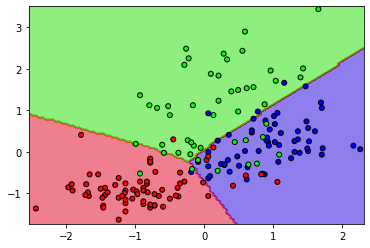

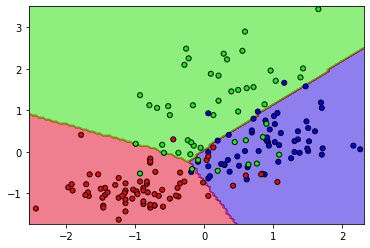

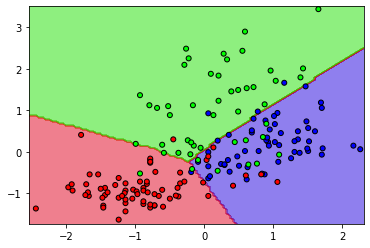

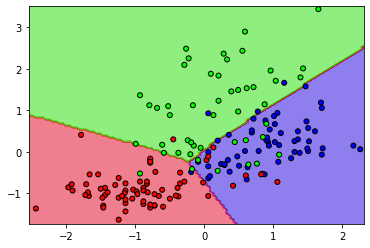

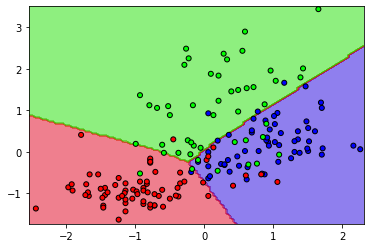

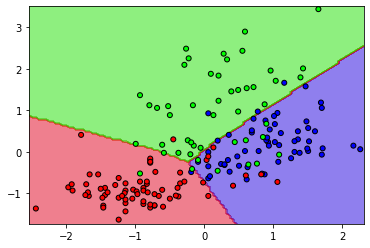

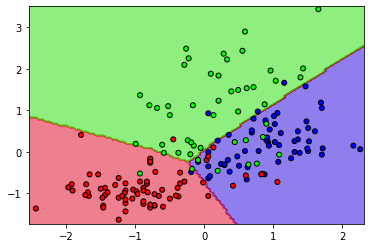

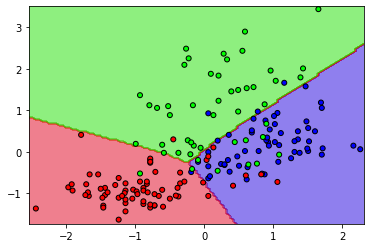

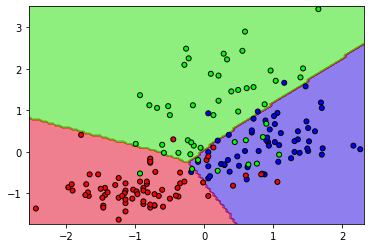

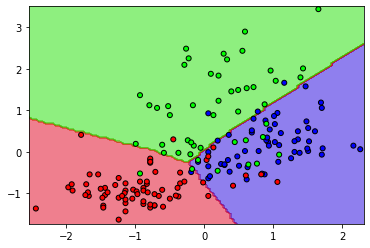

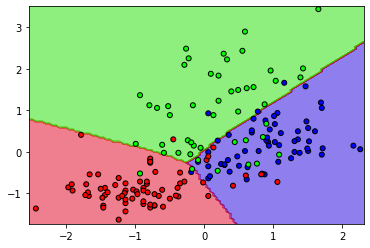

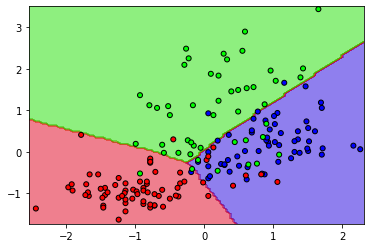

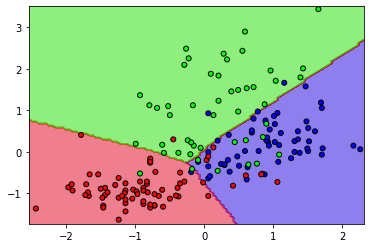

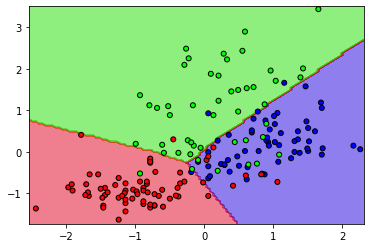

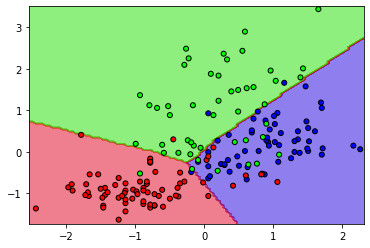

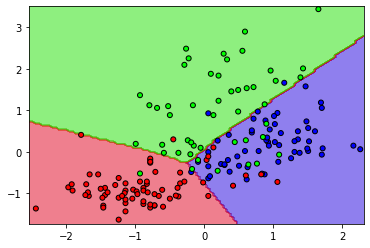

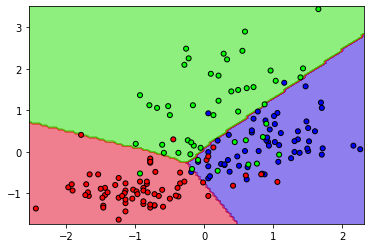

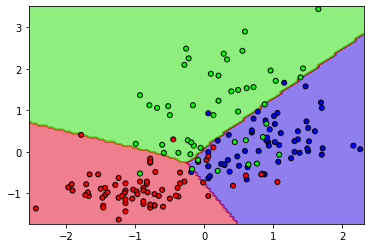

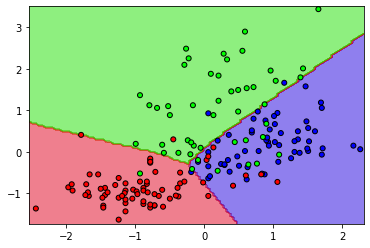

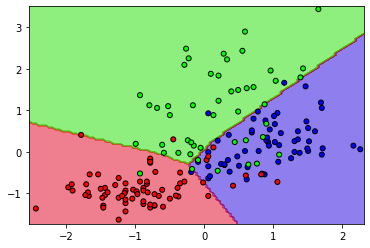

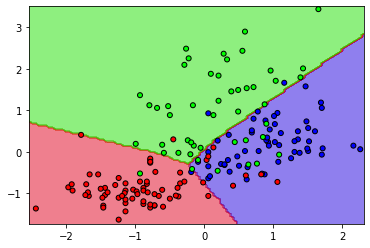

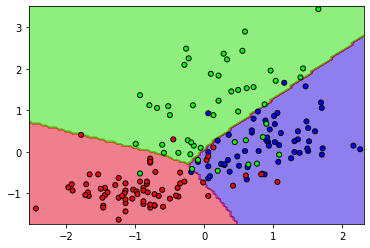

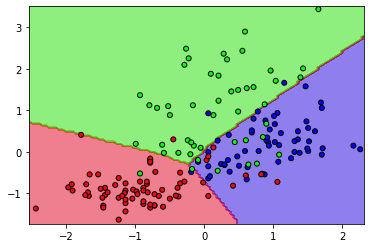

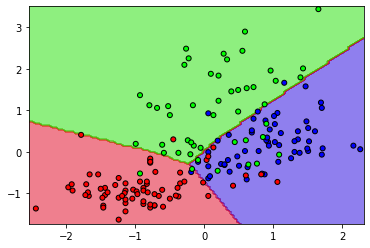

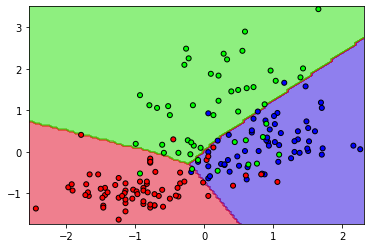

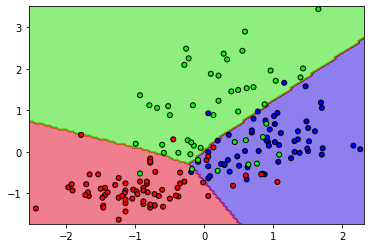

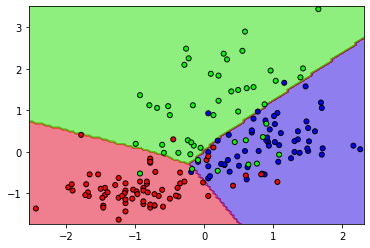

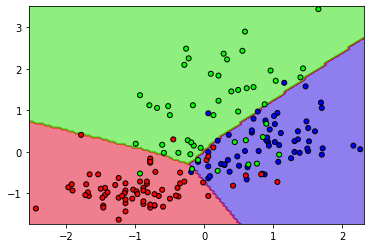

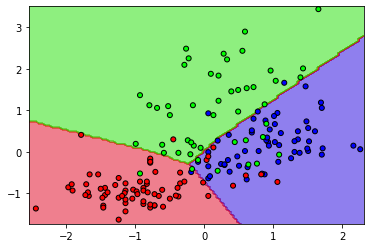

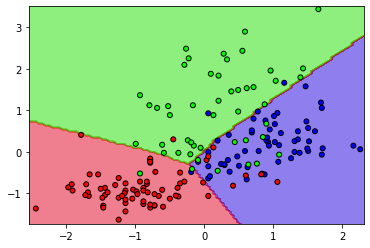

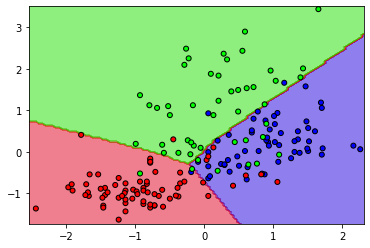

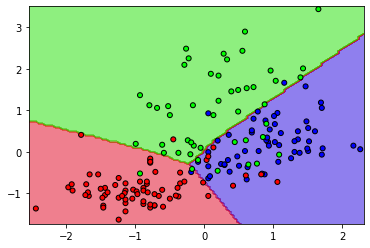

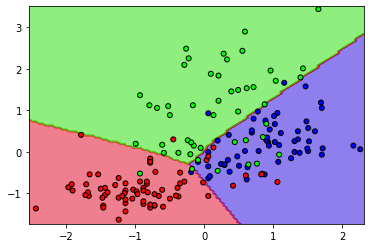

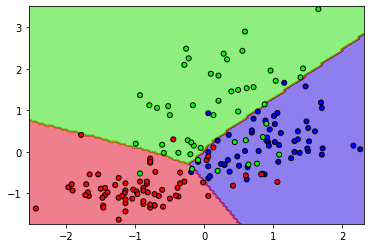

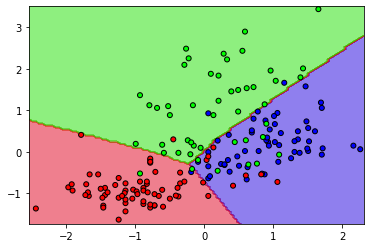

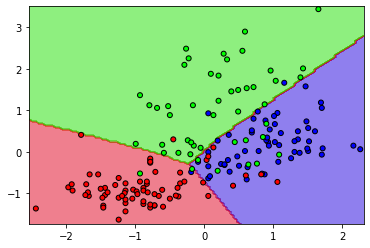

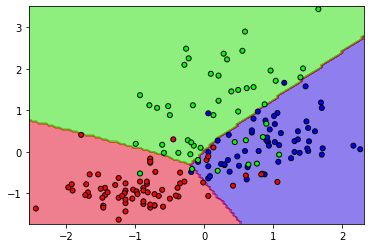

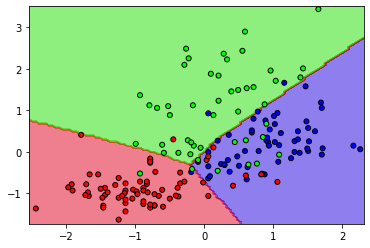

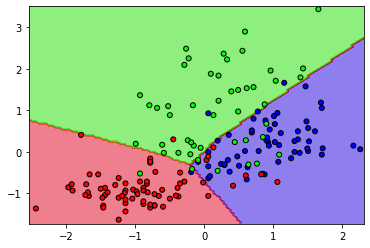

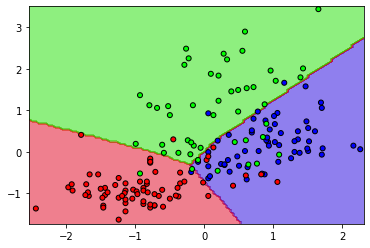

In [20]:
for i in range(4000):
  # Forward
  pred = net(X)
  loss = criterion(pred, Y)
  # Backward
  loss.backward()
  optimizer.step()
  if i%100 == 0:
    plt.figure()
    plot_boundary(data, targets, net)